In [59]:
!pip install missingno

In [31]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time

sns.set_theme()
import os

##### Set the current working directory to the root of your project
os.chdir("/Users/evan/Documents/School/MSDS/msds-capstone/vm-spinal-risk/vm-spinal-risk/")


from utilities import data_processing as dp_utils
from utilities import eda_tools as eda_utils

In [2]:
odi_df = pd.read_csv('./data/NormativeODI_DATA_2024-01-04_1611.csv')

In [3]:
eda_utils.check_df_unique_vals(odi_df, idx='record_id')

,redcap_survey_identifier,count
0,NaN,218
,assessment_of_back_pain_in_people_who_never_had_sp_timestamp,count
213,[not completed],2
15,2023-11-20 21:06:56,2
17,2023-11-20 21:07:19,2
43,2023-11-20 21:12:47,2
138,2023-11-20 22:35:02,1
139,2023-11-20 22:36:04,1
140,2023-11-20 22:38:37,1
141,2023-11-20 22:41:47,1


<Axes: >

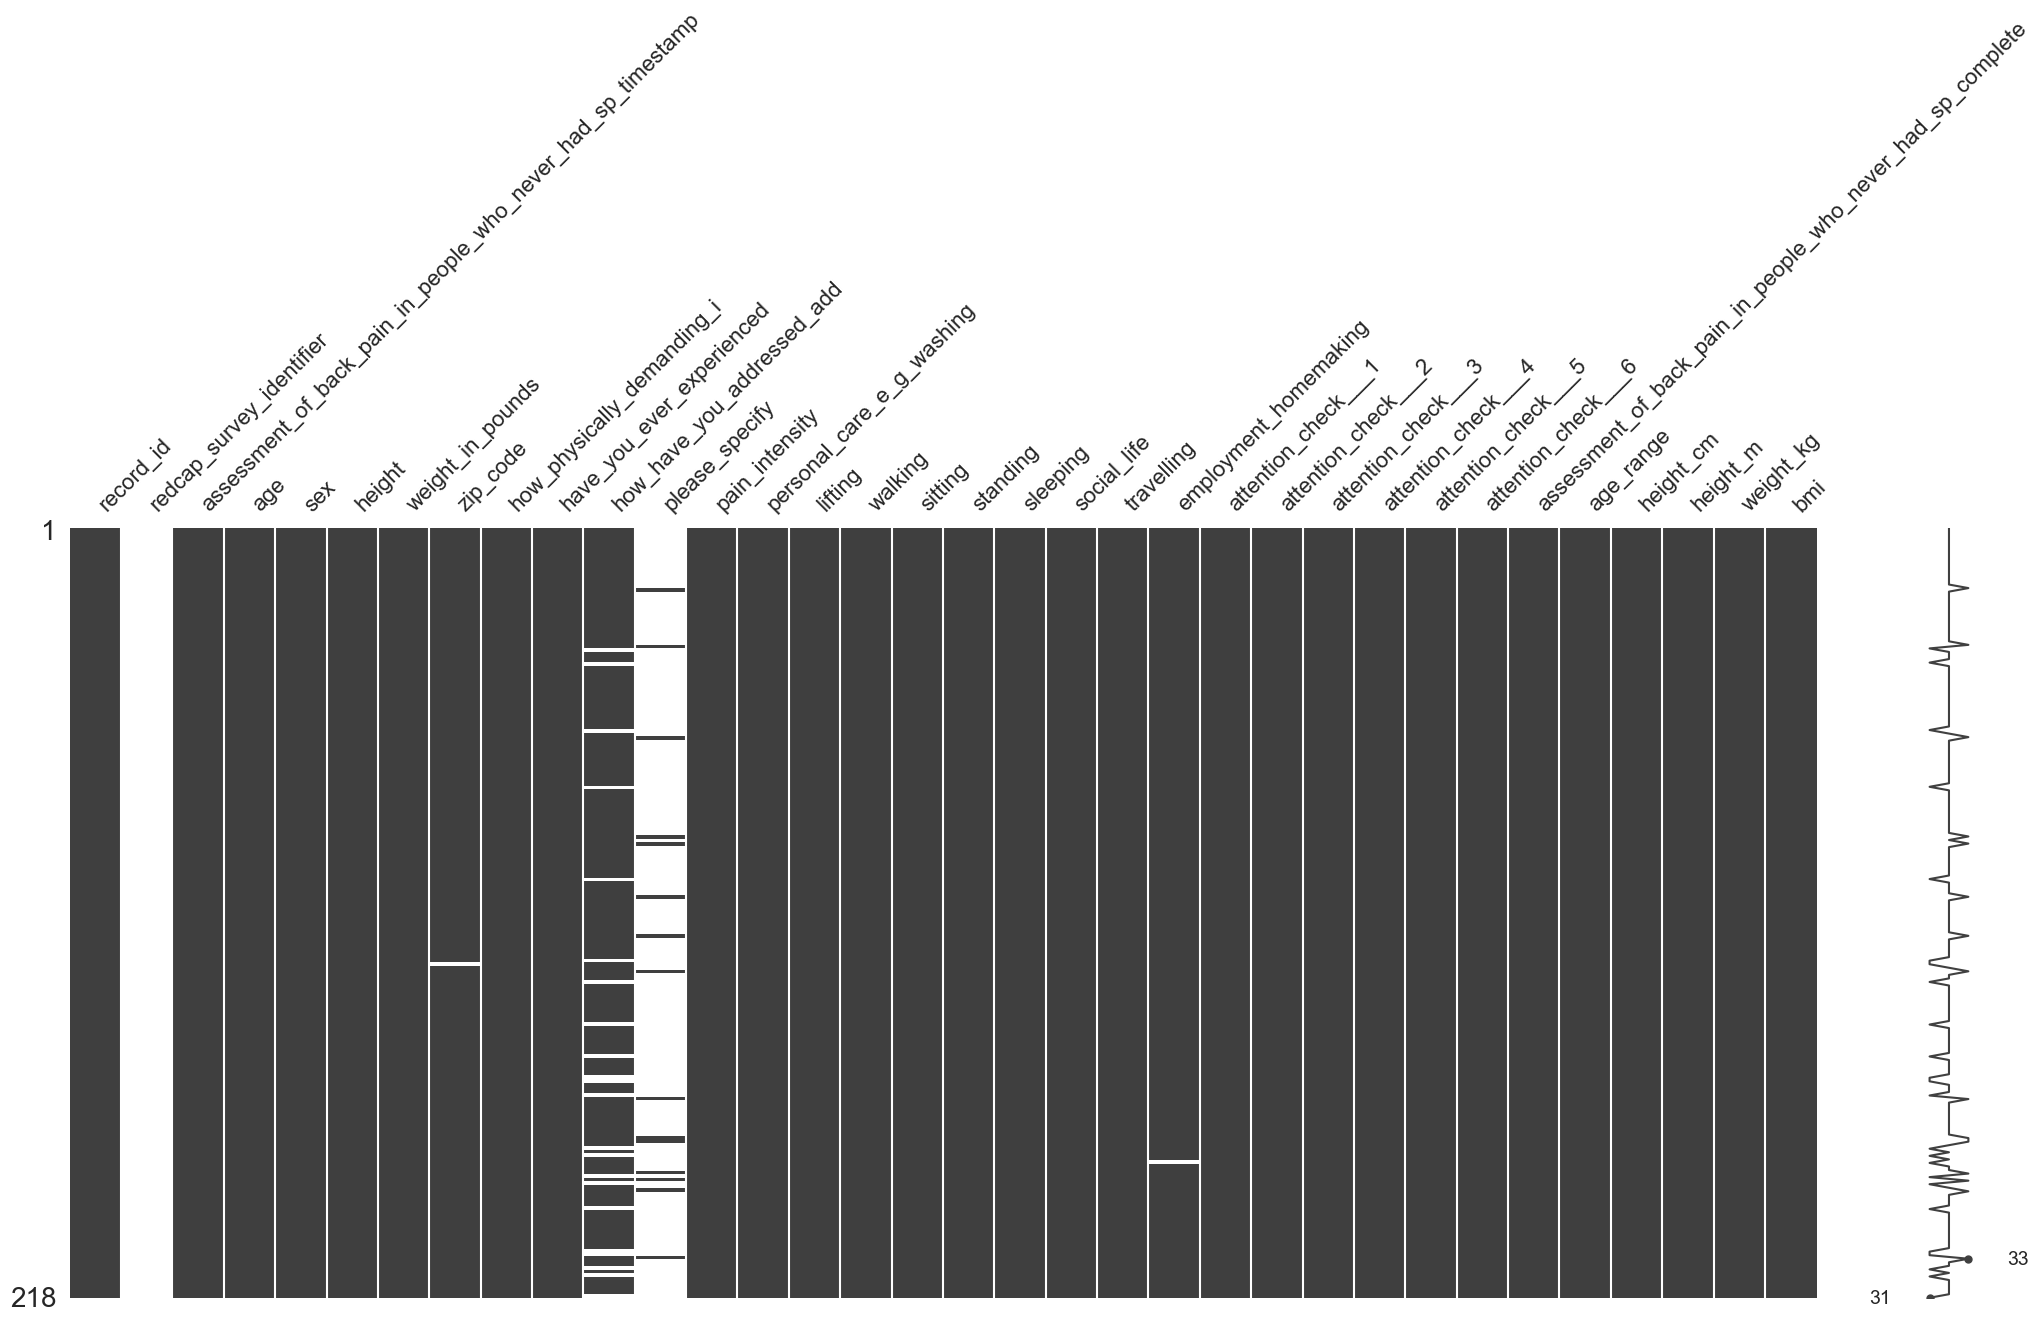

In [60]:
import missingno as msno
msno.matrix(odi_df)

In [46]:
height_registry = {
# 0: [< "4'0", "four feet", <121.92],
1: ["4'1", "four feet, one inch", 124.46],
2: ["4'2", "four feet, two inches", 126.99],
3: ["4'3", "four feet, three inches", 129.54],
4: ["4'4", "four feet, four inches", 132.08],
5: ["4'5", "four feet, five inches", 134.62],
6: ["4'6", "four feet, six inches", 137.16],
7: ["4'7", "four feet, seven inches", 139.70],
8: ["4'8", "four feet, eight inches", 142.24],
9: ["4'9", "four feet, nine inches", 144.78],
10: ["4'10", "four feet, ten inches", 147.32],
11: ["4'11", "four feet, eleven inches", 149.86],
12: ["5'0", "five feet", 152.40],
13: ["5'1", "five feet, one inch", 154.94],
14: ["5'2", "five feet, two inches", 157.48],
15: ["5'3", "five feet, three inches", 160.02],
16: ["5'4", "five feet, four inches", 162.56],
17: ["5'5", "five feet, five inches", 165.10],
18: ["5'6", "five feet, six inches", 167.64],
19: ["5'7", "five feet, seven inches", 170.18],
20: ["5'8", "five feet, eight inches", 172.72],
21: ["5'9", "five feet, nine inches", 175.26],
22: ["5'10", "five feet, ten inches", 177.80],
23: ["5'11", "five feet, eleven inches", 180.34],
24: ["6'0", "six feet", 182.88],
25: ["6'1", "six feet, one inch", 185.42],
26: ["6'2", "six feet, two inches", 187.96],
27: ["6'3", "six feet, three inches", 190.50],
28: ["6'4", "six feet, four inches", 193.04],
29: ["6'5", "six feet, five inches", 195.58],
30: ["6'6", "six feet, six inches", 198.12],
31: ["6'7", "six feet, seven inches", 200.66],
32: ["6'8", "six feet, eight inches", 203.20],
33: ["6'9", "six feet, nine inches", 205.74],
34: ["6'10", "six feet, ten inches", 208.28],
35: ["6'11", "six feet, eleven inches", 210.82],
36: ["7'0", "seven feet", 213.36],
# 37: [>"7'0" (seven feet", >213.36],
}

In [63]:
height_registry = {
# 0: [< "4'0", "four feet", <121.92],
1: ["4'1", "four feet, one inch", 124.46],
2: ["4'2", "four feet, two inches", 126.99],
3: ["4'3", "four feet, three inches", 129.54],
4: ["4'4", "four feet, four inches", 132.08],
5: ["4'5", "four feet, five inches", 134.62],
6: ["4'6", "four feet, six inches", 137.16],
7: ["4'7", "four feet, seven inches", 139.70],
8: ["4'8", "four feet, eight inches", 142.24],
9: ["4'9", "four feet, nine inches", 144.78],
10: ["4'10", "four feet, ten inches", 147.32],
11: ["4'11", "four feet, eleven inches", 149.86],
12: ["5'0", "five feet", 152.40],
13: ["5'1", "five feet, one inch", 154.94],
14: ["5'2", "five feet, two inches", 157.48],
15: ["5'3", "five feet, three inches", 160.02],
16: ["5'4", "five feet, four inches", 162.56],
17: ["5'5", "five feet, five inches", 165.10],
18: ["5'6", "five feet, six inches", 167.64],
19: ["5'7", "five feet, seven inches", 170.18],
20: ["5'8", "five feet, eight inches", 172.72],
21: ["5'9", "five feet, nine inches", 175.26],
22: ["5'10", "five feet, ten inches", 177.80],
23: ["5'11", "five feet, eleven inches", 180.34],
24: ["6'0", "six feet", 182.88],
25: ["6'1", "six feet, one inch", 185.42],
26: ["6'2", "six feet, two inches", 187.96],
27: ["6'3", "six feet, three inches", 190.50],
28: ["6'4", "six feet, four inches", 193.04],
29: ["6'5", "six feet, five inches", 195.58],
30: ["6'6", "six feet, six inches", 198.12],
31: ["6'7", "six feet, seven inches", 200.66],
32: ["6'8", "six feet, eight inches", 203.20],
33: ["6'9", "six feet, nine inches", 205.74],
34: ["6'10", "six feet, ten inches", 208.28],
35: ["6'11", "six feet, eleven inches", 210.82],
36: ["7'0", "seven feet", 213.36],
# 37: [>"7'0" (seven feet", >213.36],
}

def get_height_value(value, registry=height_registry, unit='metric'):
    try:
        if unit == 'metric':
            return registry[value][2]
        elif unit == 'imperial':
            return registry[value][0]
        else:
            raise ValueError("Invalid unit. Supported units are 'metric' and 'imperial'.")
    except KeyError as ke:
        raise KeyError(f"Value '{value}' not found in the height registry. Please provide a valid value.") from ke
    except Exception as e:
        raise Exception(f"An unexpected error occurred: {e}")
    
def get_weight_value(value, unit='metric', starting_value=90):
    weight = value + starting_value
    try:
        if unit == 'metric':
            return weight*0.453592 # Converting to kg
        elif unit == 'imperial':
            return weight
        else:
            raise ValueError("Invalid unit. Supported units are 'metric' and 'imperial'")
    except Exception as e:
        raise Exception(f"An unexpected error occured: {e}")

def compute_bmi(height, weight):
    """
    Computes bmi based on height (m) and weight (kg)
    https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html#:~:text=With%20the%20metric%20system%2C%20the,by%2010%2C000%2C%20can%20be%20used.
    """
    return weight / (height **2)

def get_age_ranges(df, age_column):
    df = df.copy()
    age = df[age_column]
    # Define conditions
    conditions = [
        age < 20,
        (20 <= age) & (age < 30),
        (30 <= age) & (age < 40),
        (40 <= age) & (age < 50),
        (50 <= age) & (age < 60),
        (60 <= age) & (age < 70),
        (70 <= age) & (age < 80),
        (80 <= age)
    ]

    # Define corresponding values for each condition
    result_values = [
        "<20",
        "20-30",
        "30-40",
        "40-50",
        "50-60",
        "60-70",
        "70-80",
        "80+"
    ]

    # Apply conditions using numpy.select
    df['age_range'] = np.select(conditions, result_values, default=0)
    return df

odi_questions = [
    'pain_intensity',
    'personal_care_e_g_washing', 'lifting', 'walking', 'sitting',
    'standing', 'sleeping', 'social_life', 'travelling',
    'employment_homemaking'
]
def get_odi_score(df, odi_cols=odi_questions):
    df = df.copy()
    final_df = df[np.all(df[odi_cols] >= 1, axis=1) & np.all(df[odi_cols] <= 5, axis=1)].copy()
    final_df['odi_score'] = np.sum(final_df[odi_cols], axis=1)
    return final_df

In [132]:
# Transforming features
odi_df['height_m'] = odi_df.height.apply(lambda h: get_height_value(value=h, unit='metric'))/100
odi_df['weight_kg'] = odi_df.weight_in_pounds.apply(lambda h: get_weight_value(value=h, unit='metric'))
odi_df['bmi'] = odi_df[['height_m', 'weight_kg']].apply(lambda row: compute_bmi(row.height_m, row.weight_kg), axis=1)
odi_df = get_age_ranges(odi_df, age_column='age')
odi_df = get_odi_score(odi_df)

# Renaming columns
odi_df = odi_df.rename(columns={"how_physically_demanding_i": "occupation_demands", "have_you_ever_experienced": "lbp", "how_have_you_addressed_add": "lbp_treatment"})

# Invert lower back pain column
# odi_df['lbp'] = np.where(odi_df.lbp == 0, 1, 0)

In [ ]:
# Clean up the zipcode
odi_df['zip_code'] = odi_df['zip_code'].astype(str).apply(lambda code: code[:-2])

In [ ]:
# Clean up the zipcode
odi_df['zip_code'] = odi_df['zip_code'].astype(str).apply(lambda code: code[:-2])

# Extracting the state from the zipcodes
headers = { 
  "apikey": "952f36a0-b0e6-11ee-bf04-7fb35e5ffc15"}

pause_duration = 0.5
all_results = []
for code in odi_df['zip_code']:
  params = (
    ("codes",f"{code}"),
    ("country", "US")
  );

  response = requests.get('https://app.zipcodebase.com/api/v1/search', headers=headers, params=params).json()
  if not isinstance(response['results'], list):
    all_results.append(response['results'][code])
  else:
    print(f"Failed to extract zipcode for {code}")


  # Throttling the api
  time.sleep(0.01)

Failed to extract zipcode for 3063
Failed to extract zipcode for 8260
Failed to extract zipcode for 7702
Failed to extract zipcode for n
Failed to extract zipcode for 7109
Failed to extract zipcode for 2150
Failed to extract zipcode for 2138
Failed to extract zipcode for 1501
Failed to extract zipcode for 2176


In [ ]:
final_results = [result[0] for result in all_results]
locations_df = pd.DataFrame(final_results)
# reduce to only distinct rows
locations_df = locations_df.drop_duplicates().reset_index().drop(columns='index')

In [ ]:
locations_df.head()

,postal_code,country_code,latitude,longitude,city,state,city_en,state_en,state_code,province,province_code
0,46221,US,39.75090000,-86.19240000,Indianapolis,Indiana,Indianapolis,Indiana,IN,Marion,097
1,44107,US,41.48470000,-81.80180000,Lakewood,Ohio,Lakewood,Ohio,OH,Cuyahoga,035
2,12508,US,41.50970000,-73.96340000,Beacon,New York,Beacon,New York,NY,Dutchess,027
3,59474,US,48.50370000,-111.83910000,Shelby,Montana,Shelby,Montana,MT,Toole,101
4,60647,US,41.92090000,-87.70430000,Chicago,Illinois,Chicago,Illinois,IL,Cook,031


In [ ]:
# joining dataframes
relevant_cols = ['postal_code', 'city', 'state', 'state_code', 'latitude', 'longitude']
odi_loc_df = odi_df.merge(locations_df[relevant_cols], how='left', left_on='zip_code', right_on='postal_code')

In [ ]:
odi_loc_df.head()

,record_id,redcap_survey_identifier,assessment_of_back_pain_in_people_who_never_had_sp_timestamp,age,sex,height,weight_in_pounds,zip_code,how_physically_demanding_i,have_you_ever_experienced,...,attention_check___5,attention_check___6,assessment_of_back_pain_in_people_who_never_had_sp_complete,age_range,postal_code,city,state,state_code,latitude,longitude
0,1,NaN,2023-11-14 21:52:17,36,1,20,17,46221,5,1,...,0,1,2,30-40,46221,Indianapolis,Indiana,IN,39.75090000,-86.19240000
1,2,NaN,2023-11-20 21:03:17,45,2,20,89,44107,2,1,...,1,0,2,40-50,44107,Lakewood,Ohio,OH,41.48470000,-81.80180000
2,3,NaN,2023-11-20 21:03:27,29,2,14,9,12508,3,1,...,1,1,2,20-30,12508,Beacon,New York,NY,41.50970000,-73.96340000
3,4,NaN,2023-11-20 21:04:07,69,2,23,46,59474,3,1,...,1,1,2,60-70,59474,Shelby,Montana,MT,48.50370000,-111.83910000
4,5,NaN,2023-11-20 21:04:31,26,1,21,74,60647,1,1,...,0,0,2,20-30,60647,Chicago,Illinois,IL,41.92090000,-87.70430000


In [127]:
from tableone import TableOne

## Create an instance of TableOne with the input arguments
columns = [
       'age',
       'sex', 
       'height_m', 
       'weight_kg', 
       'bmi',
       'lbp',
       # 'how_physically_demanding_i', 
       # 'have_you_ever_experienced',
       # 'how_have_you_addressed_add', 
       'age_range', 
       'odi_score']
nonnormal = ['odi_score', 'weight_kg', 'bmi']
categorical = ['age_range', 'sex', 'lbp']
mytable = TableOne(odi_df, columns=columns, categorical=categorical, nonnormal=nonnormal)

mytable
## Display the table using the tabulate method. The tablefmt argument allows the table to be displayed in multiple formats, including “github”, “grid”, “fancy_grid”, “rst”, “html”, and “latex”.:
# print(mytable.tabulate(tablefmt="github"))

Missing           Overall
n                                                     205
age, mean (SD)                        0       42.9 (12.8)
sex, n (%)                1           0         83 (40.5)
                          2                    122 (59.5)
height_m, mean (SD)                   0         1.7 (0.1)
weight_kg, median [Q1,Q3]             0  72.1 [61.7,91.2]
bmi, median [Q1,Q3]                   0  24.6 [20.8,28.9]
lbp, n (%)                0           0          20 (9.8)
                          1                    185 (90.2)
age_range, n (%)          20-30       0         28 (13.7)
                          30-40                 70 (34.1)
                          40-50                 50 (24.4)
                          50-60                 26 (12.7)
                          60-70                 24 (11.7)
                          70-80                   6 (2.9)
                          80+                     1 (0.5)
odi_score, median [Q1,Q3]             0  17.0 [13.0,24.0]

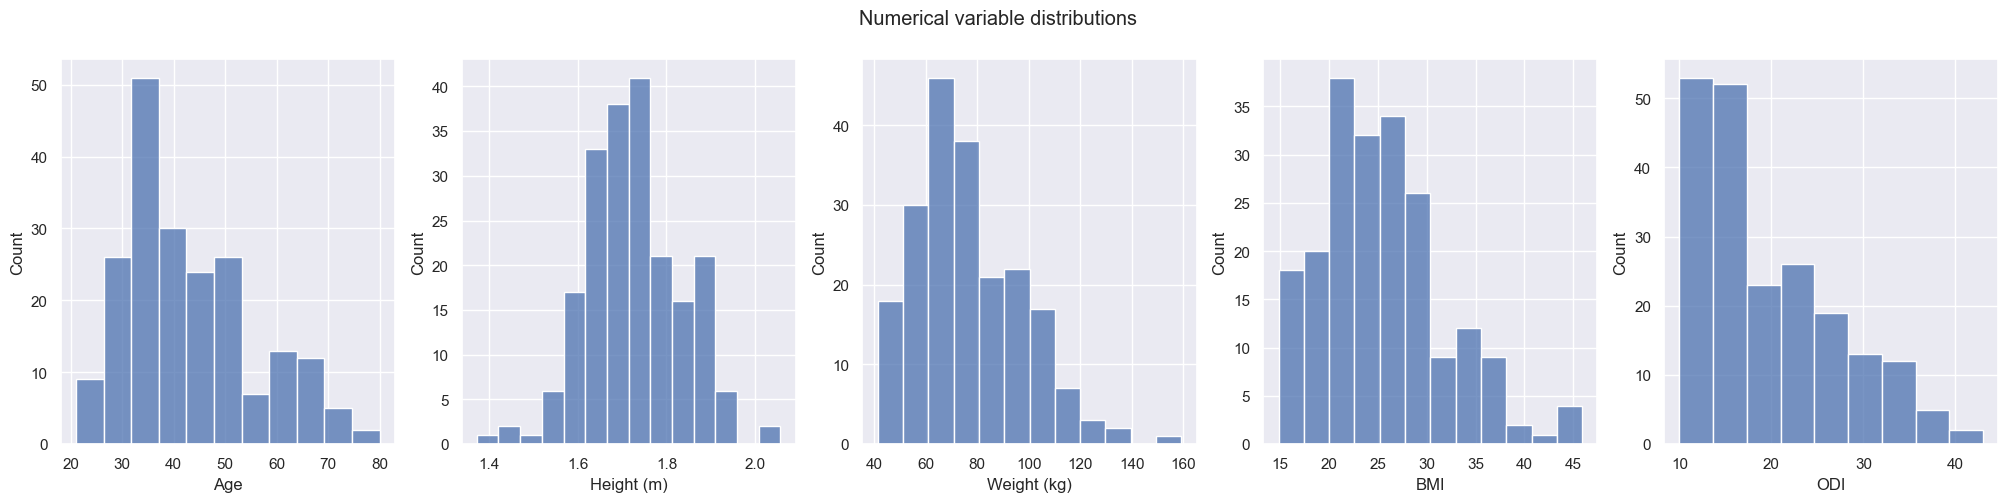

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
sns.histplot(odi_df['age'], ax=axes[0])
sns.histplot(odi_df['height_m'], ax=axes[1])
sns.histplot(odi_df['weight_kg'], ax=axes[2])
sns.histplot(odi_df['bmi'], ax=axes[3])
sns.histplot(odi_df['odi_score'], ax=axes[4])
plt.suptitle("Numerical variable distributions")
axes[0].set_xlabel("Age")
axes[1].set_xlabel("Height (m)")
axes[2].set_xlabel("Weight (kg)")
axes[3].set_xlabel("BMI")
axes[4].set_xlabel("ODI")
plt.show()

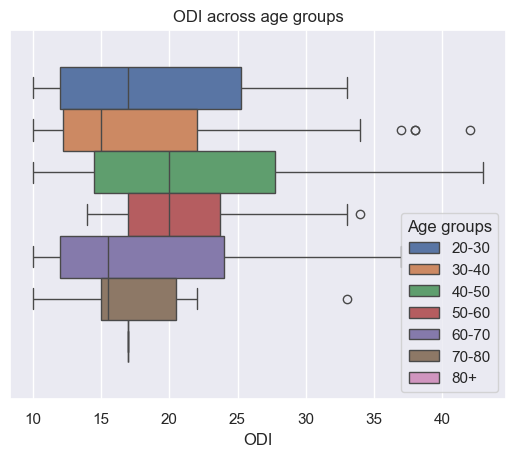

In [129]:
sns.boxplot(odi_df.sort_values('age_range'), x='odi_score', hue='age_range')
plt.title("ODI across age groups")
plt.legend(title="Age groups")
plt.xlabel("ODI")
plt.show()

<Axes: xlabel='odi_score'>

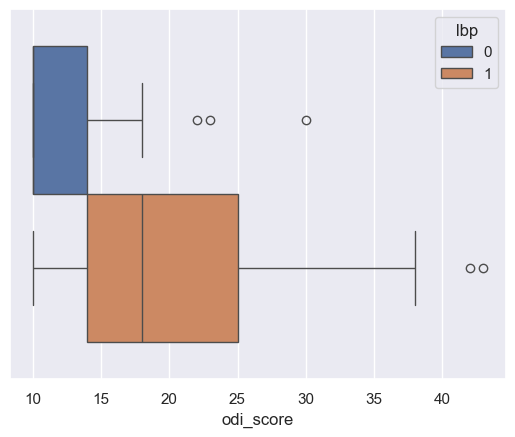

In [130]:
sns.boxplot(odi_df.sort_values('age_range'), x='odi_score', hue='lbp')

<Axes: xlabel='odi_score'>

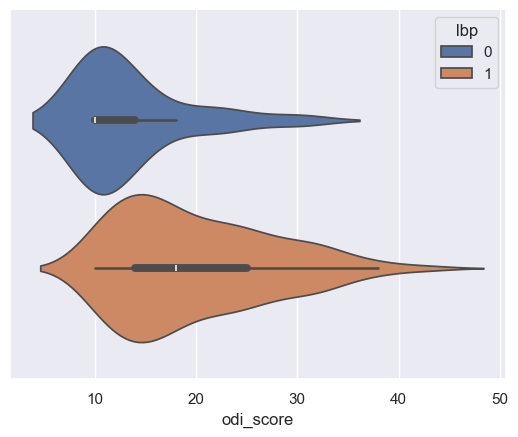

In [131]:
# ODI broken up by age group
sns.violinplot(odi_df.sort_values('age_range'), x='odi_score', hue='lbp')

In [85]:
# ODI
nonnormal = ['odi_score']
categorical = ['age_range', 'sex']
columns = nonnormal + categorical
mytable = TableOne(odi_df, columns=columns, categorical=categorical, nonnormal=nonnormal, groupby=['sex'], pval=True)

## Display the table using the tabulate method. The tablefmt argument allows the table to be displayed in multiple formats, including “github”, “grid”, “fancy_grid”, “rst”, “html”, and “latex”.:
# print(mytable.tabulate(tablefmt="github"))
# mytable.tabulate(tablefmt=)
mytable

Grouped by sex                                                              
                                       Missing           Overall                 1                 2 P-Value
n                                                            205                83               122        
odi_score, median [Q1,Q3]                    0  17.0 [13.0,24.0]  17.0 [12.0,23.0]  18.0 [14.0,26.0]   0.263
age_range, n (%)          20-30              0         28 (13.7)           8 (9.6)         20 (16.4)   0.321
                          30-40                        70 (34.1)         34 (41.0)         36 (29.5)        
                          40-50                        50 (24.4)         16 (19.3)         34 (27.9)        
                          50-60                        26 (12.7)         12 (14.5)         14 (11.5)        
                          60-70                        24 (11.7)         10 (12.0)         14 (11.5)        
                          70-80                          6 (2.9)           2 (2.4)           4 (3.3)        
                          80+                            1 (0.5)           1 (1.2)                          
sex, n (%)                1                  0         83 (40.5)        83 (100.0)                    <0.001
                          2                           122 (59.5)                         122 (100.0)        
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: age_range.

In [87]:
# ODI
nonnormal = ['odi_score']
categorical = ['age_range', 'sex']
columns = nonnormal + categorical
mytable = TableOne(odi_df, columns=columns, categorical=categorical, nonnormal=nonnormal, groupby=['age_range'], pval=True)

## Display the table using the tabulate method. The tablefmt argument allows the table to be displayed in multiple formats, including “github”, “grid”, “fancy_grid”, “rst”, “html”, and “latex”.:
# print(mytable.tabulate(tablefmt="github"))
# mytable.tabulate(tablefmt=)
mytable

Grouped by age_range                                                                                                                                                        
                                             Missing           Overall             20-30             30-40             40-50             50-60             60-70             70-80               80+ P-Value
n                                                                  205                28                70                50                26                24                 6                 1        
odi_score, median [Q1,Q3]                          0  17.0 [13.0,24.0]  17.0 [12.0,25.2]  15.0 [12.2,22.0]  20.0 [14.5,27.8]  20.0 [17.0,23.8]  15.5 [12.0,24.0]  15.5 [15.0,20.5]  17.0 [17.0,17.0]   0.109
age_range, n (%)          20-30                    0         28 (13.7)        28 (100.0)                                                                                                              <0.001
                          30-40                              70 (34.1)                          70 (100.0)                                                                                                  
                          40-50                              50 (24.4)                                            50 (100.0)                                                                                
                          50-60                              26 (12.7)                                                              26 (100.0)                                                              
                          60-70                              24 (11.7)                                                                                24 (100.0)                                            
                          70-80                                6 (2.9)                                                                                                   6 (100.0)                          
                          80+                                  1 (0.5)                                                                                                                     1 (100.0)        
sex, n (%)                1                        0         83 (40.5)          8 (28.6)         34 (48.6)         16 (32.0)         12 (46.2)         10 (41.7)          2 (33.3)         1 (100.0)   0.321
                          2                                 122 (59.5)         20 (71.4)         36 (51.4)         34 (68.0)         14 (53.8)         14 (58.3)          4 (66.7)                          
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: age_range, sex.